In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from IPython.display import Image
from keras.applications.mobilenet import preprocess_input
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob 
from keras.models import load_model

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [224, 224] 

In [3]:
train_path = '/content/drive/My Drive/DataSet/fer2013/train' 
valid_path = '/content/drive/My Drive/DataSet/fer2013/validation'

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=15,
        )
validation_batches = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=15,
        )
#train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
#       train_path, target_size=(224, 224), batch_size=10)
#valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
#       valid_path, target_size=(224, 224), batch_size=10)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [12]:
mobile = keras.applications.mobilenet.MobileNet()
mobile. summary() 

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [13]:
folders = glob('/content/drive/My Drive/DataSet/fer2013/train/*') 
x = mobile.layers[-6].output
predictions = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [14]:
model. summary() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [15]:
for layer in model.layers[:-20]:
      layer.trainable = False

model.compile(Adam(lr=.00005), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_batches, steps_per_epoch=63, 
                                      validation_data=validation_batches, validation_steps=10, epochs=15, verbose=2) 

Epoch 1/15
 - 567s - loss: 2.1471 - accuracy: 0.2529 - val_loss: 2.3708 - val_accuracy: 0.2133
Epoch 2/15
 - 539s - loss: 1.7550 - accuracy: 0.3471 - val_loss: 2.3135 - val_accuracy: 0.2667
Epoch 3/15
 - 522s - loss: 1.6588 - accuracy: 0.3704 - val_loss: 1.6340 - val_accuracy: 0.2667
Epoch 4/15
 - 560s - loss: 1.6436 - accuracy: 0.3683 - val_loss: 1.9515 - val_accuracy: 0.3200
Epoch 5/15
 - 559s - loss: 1.5491 - accuracy: 0.4349 - val_loss: 2.0978 - val_accuracy: 0.2667
Epoch 6/15
 - 547s - loss: 1.5449 - accuracy: 0.3979 - val_loss: 1.6701 - val_accuracy: 0.3267
Epoch 7/15
 - 542s - loss: 1.5217 - accuracy: 0.4275 - val_loss: 1.6484 - val_accuracy: 0.4267
Epoch 8/15
 - 546s - loss: 1.5531 - accuracy: 0.4159 - val_loss: 2.0597 - val_accuracy: 0.3000
Epoch 9/15
 - 550s - loss: 1.4599 - accuracy: 0.4455 - val_loss: 2.1630 - val_accuracy: 0.3800
Epoch 10/15
 - 559s - loss: 1.4842 - accuracy: 0.4328 - val_loss: 1.7915 - val_accuracy: 0.3467
Epoch 11/15
 - 553s - loss: 1.4735 - accuracy: 0.

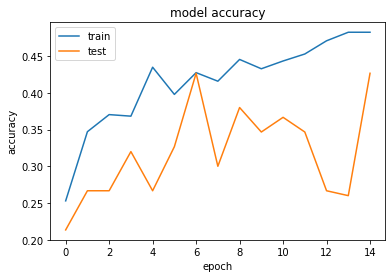

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

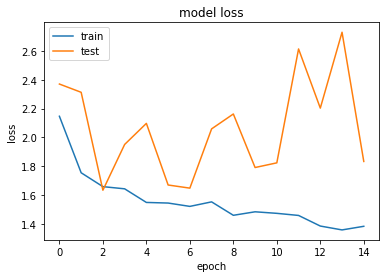

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save('Emotion.h5')